In [1]:
import numpy as np
import scipy.stats as sps

import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
lam_gen_dist = sps.multivariate_normal(np.array([0.5,0.5]),0.25*np.eye(2))

n_obs = 1500
lam_gen_sample = lam_gen_dist.rvs(n_obs)

def Q(lam):
    lam1,lam2 = lam.T
    return lam1+lam2

# observed
q_obs_sample = Q(lam_gen_sample)
q_obs_dist = sps.norm(dist_gen.mean.sum(),np.sqrt(dist_gen.cov.sum()))

# initial
n_pred = 2500
lam_init_dist = sps.multivariate_normal(np.zeros(2),np.eye(2))
lam_init_sample = lam_init_dist.rvs(n_pred)

# predicted
q_pred_sample = Q(lam_init_sample)
q_pred_dist = sps.norm(lam_init_dist.mean.sum(),np.sqrt(lam_init_dist.cov.sum()))


In [19]:
# qx = np.linspace(-5,5,250)
# plt.plot(qx,q_obs_dist.pdf(qx))
# plt.hist(q_obs_sample,density=True,alpha=0.25)
# plt.plot(qx,q_pred_dist.pdf(qx))
# plt.hist(q_pred_sample,density=True,alpha=0.25)

In [22]:
lamx,lamy = [np.linspace(-3,3,150+i) for i in range(2)]
lamX,lamY = np.meshgrid(lamx,lamy)
lamXY_eval = np.stack([lamX.reshape(-1,),lamY.reshape(-1,)],axis=1)

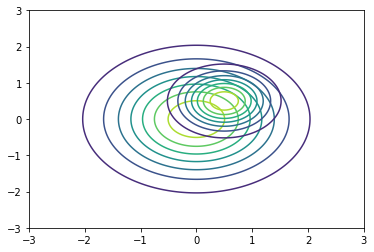

In [25]:
Z_gen = lam_gen_dist.pdf(lamXY_eval).reshape(lamX.shape)
Z_init = lam_init_dist.pdf(lamXY_eval).reshape(lamX.shape)
plt.contour(lamX,lamY,Z_init)
plt.contour(lamX,lamY,Z_gen)

In [26]:
this_r = q_obs_dist.pdf(q_pred_sample)/q_pred_dist.pdf(q_pred_sample)
print(np.mean(this_r))

1.0059352810460165


In [29]:
# accept-reject
M = np.max(this_r)
print('M = ', M)
t = np.random.uniform(0,1,q_pred_sample.shape[0])
accept_reject = np.less_equal(t,this_r/M)
print('Accepted: ',np.sum(accept_reject))
print('Accept ratio: ',np.sum(accept_reject)/len(accept_reject))

lam_update = lam_init_sample[accept_reject]

M =  2.7912232186712895
Accepted:  931
Accept ratio:  0.3724


In [37]:
# initial importance
lam_import_dist = sps.multivariate_normal(np.array([0.25,0.5]),np.diag([0.3,1.]))
lam_import_sample = lam_import_dist.rvs(n_pred)

# predicted importance
q_import_sample = Q(lam_import_sample)
q_import_dist = sps.norm(lam_import_dist.mean.sum(),np.sqrt(lam_import_dist.cov.sum()))

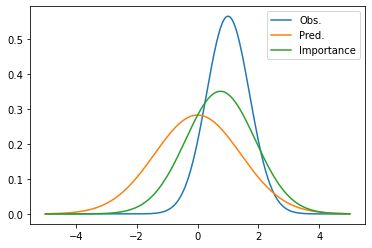

In [38]:
qx = np.linspace(-5,5,250)
plt.plot(qx,q_obs_dist.pdf(qx),label='Obs.')
# plt.hist(q_obs_sample,density=True,alpha=0.25)
plt.plot(qx,q_pred_dist.pdf(qx),label='Pred.')
# plt.hist(q_pred_sample,density=True,alpha=0.25)
plt.plot(qx,q_import_dist.pdf(qx),label='Importance')
# plt.hist(q_import_sample,density=True,alpha=0.25)
plt.legend()

In [47]:
this_import_r = q_obs_dist.pdf(q_import_sample)/q_pred_dist.pdf(q_import_sample)
this_import_r *= lam_init_dist.pdf(lam_import_sample)/lam_import_dist.pdf(lam_import_sample)
print(np.mean(this_import_r))

1.0404059392816005


In [56]:
# accept-reject
M = np.max(this_import_r)
M = 1.
print('M = ', M)
t = np.random.uniform(0,1,q_pred_sample.shape[0])
accept_reject = np.less_equal(t,this_import_r/M)
print('Accepted: ',np.sum(accept_reject))
print('Accept ratio: ',np.sum(accept_reject)/len(accept_reject))

lam_import_update = lam_import_sample[accept_reject]

M =  1.0
Accepted:  1696
Accept ratio:  0.6784


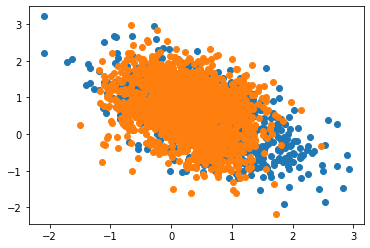

In [57]:
plt.scatter(*lam_update.T)
plt.scatter(*lam_import_update.T)